# Load the Dataset

In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


From the table above, we can see that there are 11 factors that may have some influence on perceived wine quality. In the analysis below, we'll quantify which factors play a significant role in determining quality. But first, let's check the data to ensure that there are no null values:

In [2]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Looks like there are no null values, so we are ready to move on to our data analysis.

# Exploratory Data Analysis (EDA)

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

X = wine.drop('quality', axis = 1)
#X = wine.iloc[:,0:11]
display(X.head())

y = wine['quality']
#y = wine.iloc[:,-1:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


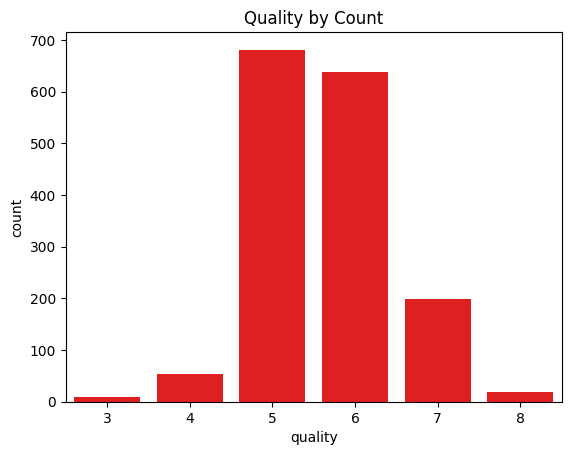

Quality Distribution [%]


,quality
quality,
3,1.0
4,3.0
5,43.0
6,40.0
7,12.0
8,1.0


In [4]:
sns.countplot(x='quality', data=wine, color='red')
plt.title('Quality by Count')
plt.show()

# Wine quality percentage (by count)
count = wine.groupby(['quality'])[['quality']].count()
total = len(wine.index)
percent = (count / total) * 100
print('Quality Distribution [%]')
display(round(percent))

- From a quick count of the quality scores, we see that most wines (83%) were given a score of 5 or 6. 
- 13% of wines were given a score of 7 or 8, and just 4% of wines were given a score of 3 or 4. 

### Let's take a look at the distribution for each of the input variables:

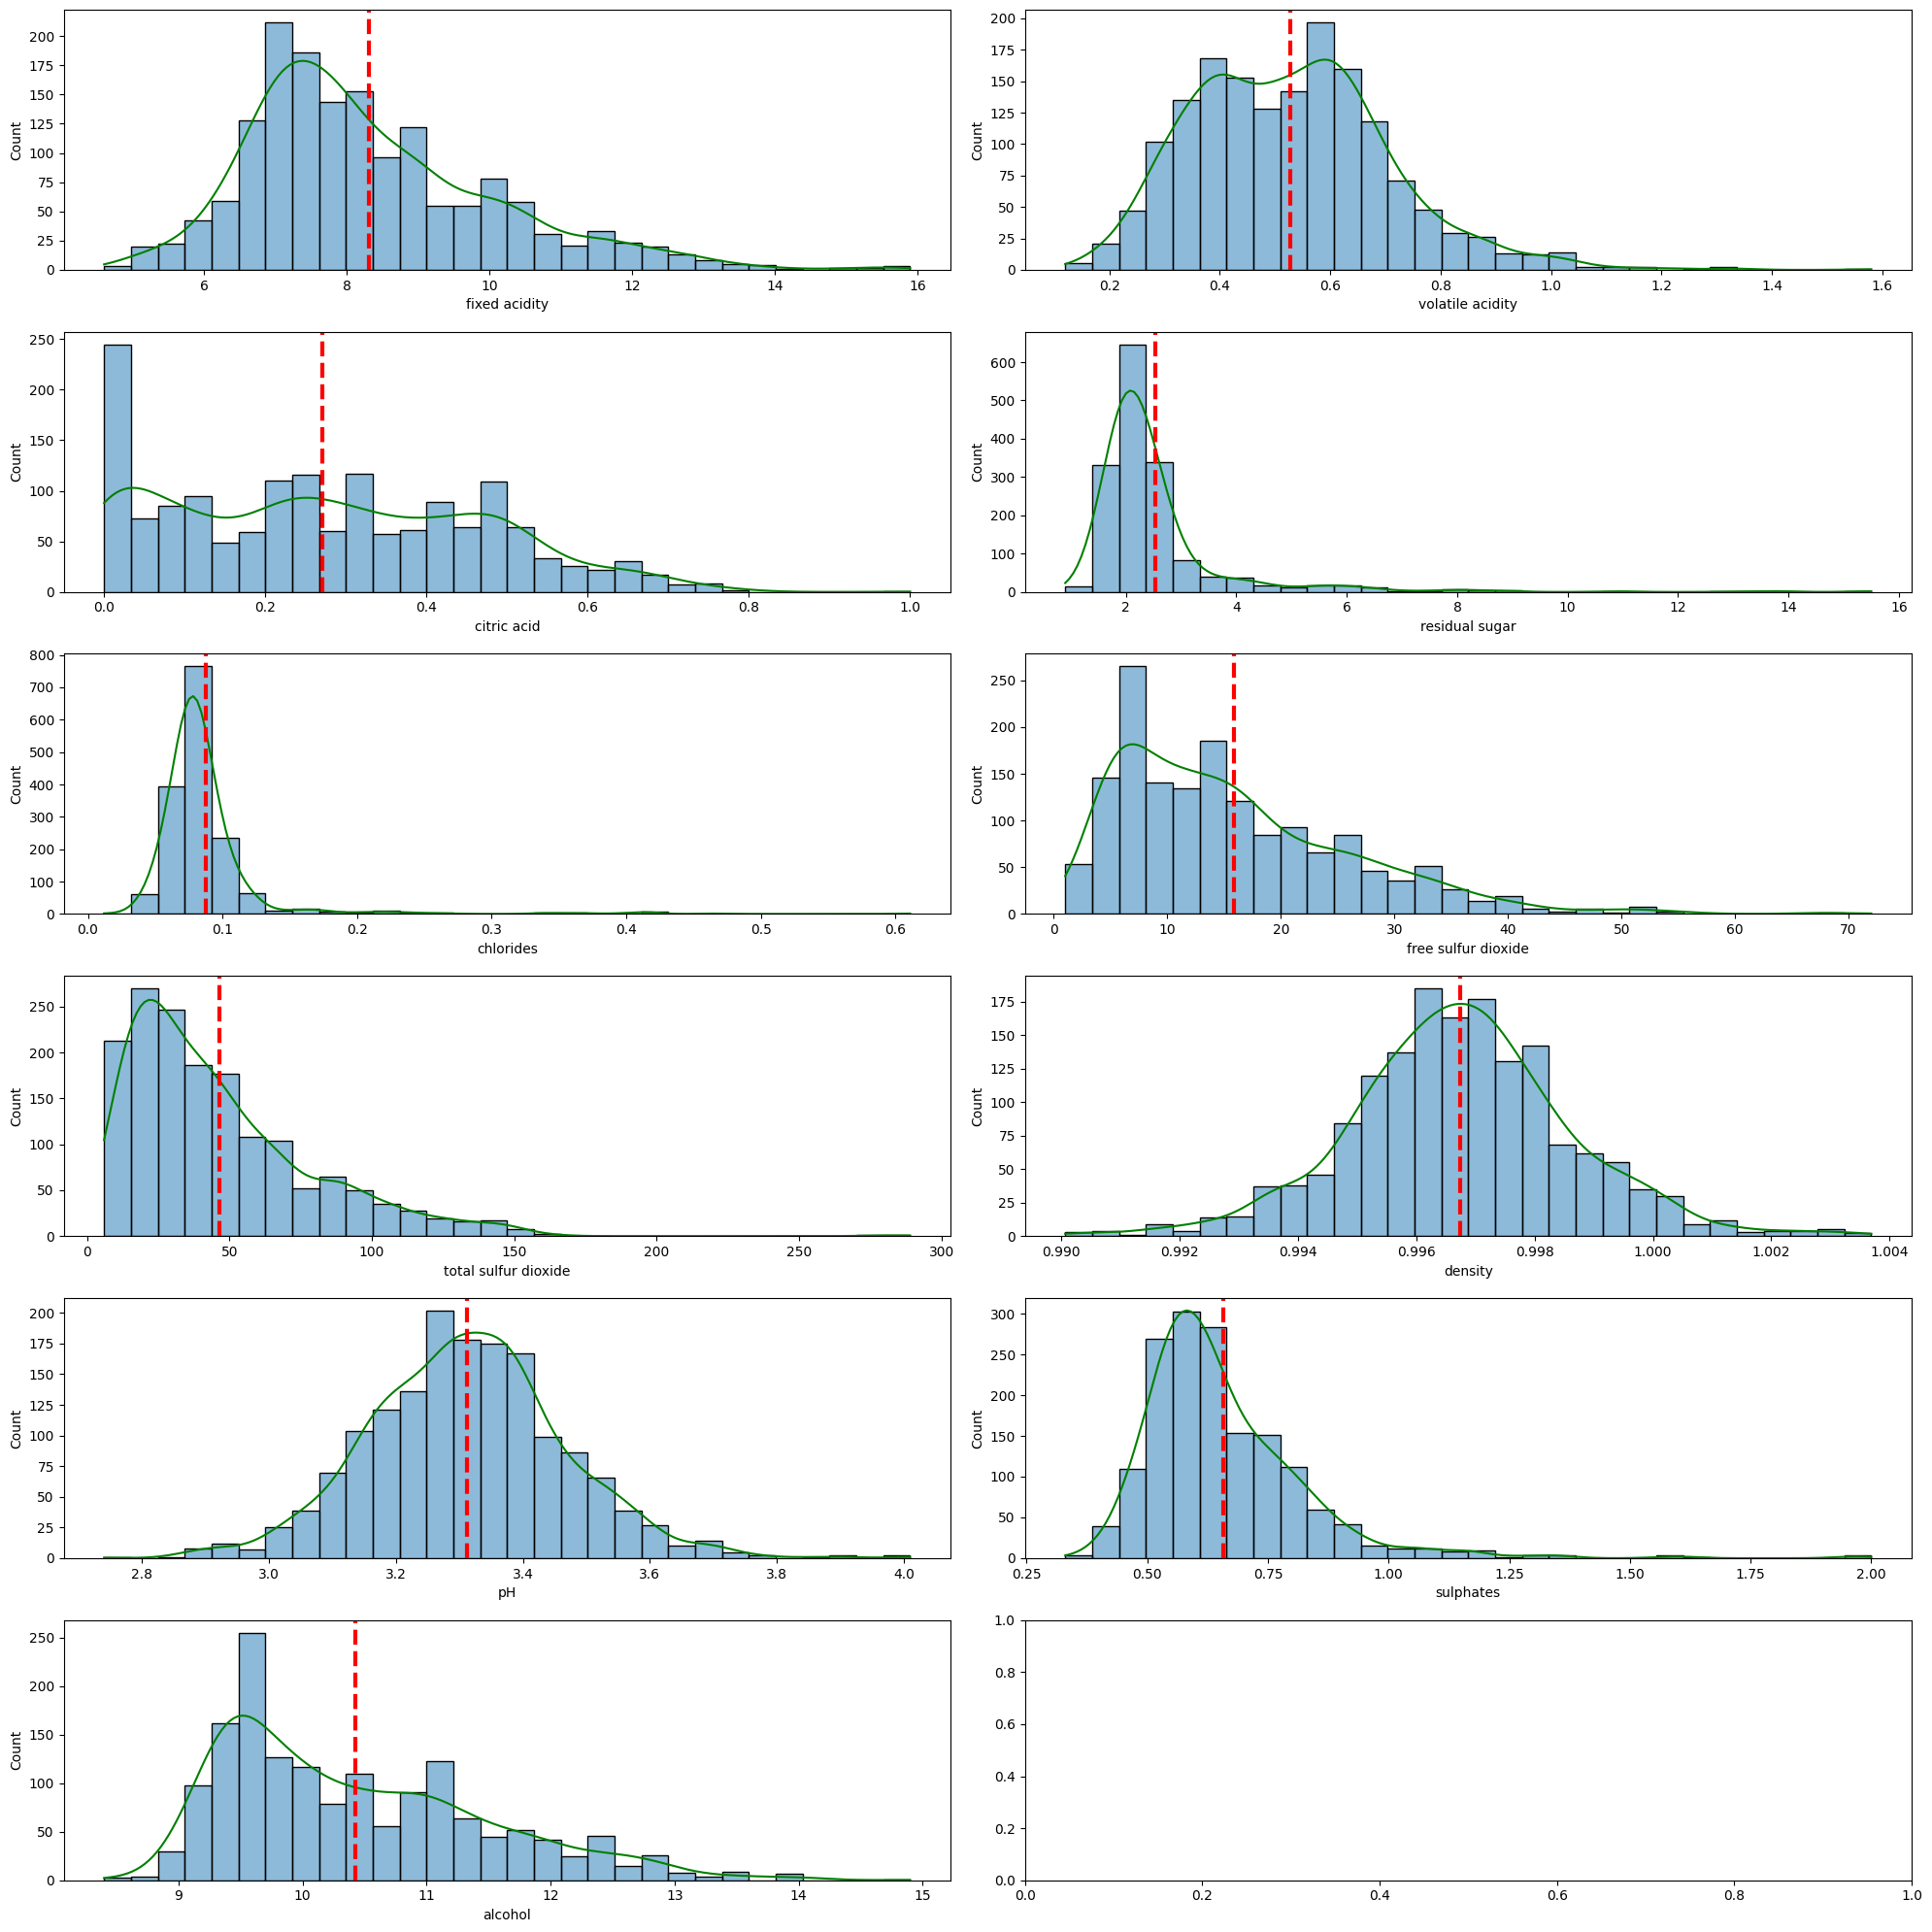

In [5]:
fig, ax = plt.subplots(6, 2, figsize=(20, 20))

for variable, subplot in zip(X, ax.flatten()):
    g = sns.histplot(wine[variable], bins=30, kde=True, ax=subplot)
    # kde = kernal density estimate, smooths the distribution (green line)
    g.lines[0].set_color('green')
    # add a vertical line across the Axes to represent the mean
    g.axvline(x=wine[variable].mean(), color='red', label='Mean', \
              linestyle='--', linewidth=3)

plt.tight_layout()

### Next, we'll look at a heat map to visualize any correlations among the input variables:

<AxesSubplot:>

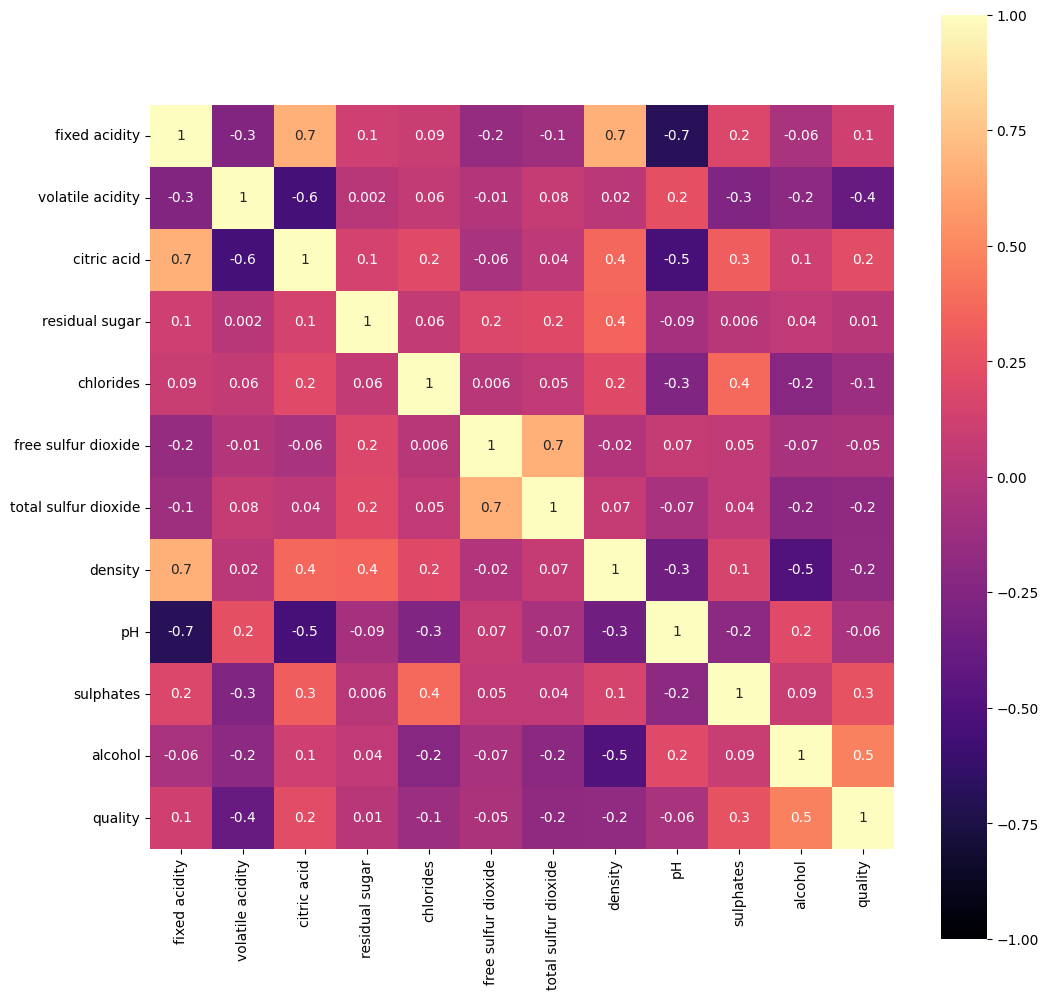

In [6]:
plt.figure(figsize=(12, 12))
sns.heatmap(wine.corr("pearson"), vmin=-1, vmax=1, \
            cmap='magma', annot=True, square=True, \
            fmt='.1g')
# values are rounded to one significant figure

From the heatmap above, we can see that some positively correlated variables (light colors) are:
- density & fixed acidity
- citric acid & fixed acidity
- free sulfur dioxide & total sulfur dioxide

Some negatively correlated variables (dark colors) are:
- pH & fixed acidity
- citric acid & volatile acidity
- density & alcohol

# Creating Machine Learning Models

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Preprocessing Data

First, we create classify each wine as good or bad based on its quality score. 

In [8]:
bins = [3, 6.5, 8]
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names, include_lowest = True)
# pd.cut(x: the input array to be binned, bins: bin edges defined, labels)

wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [9]:
# Use the LabelEncoder to set each wine's quality as a 0 or 1 (good or bad)
label_quality = LabelEncoder()

In [10]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [11]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [12]:
# Redefine X and y after transforming & scaling the data
X = wine.drop('quality', axis = 1)
y = wine['quality']

<AxesSubplot:xlabel='quality', ylabel='count'>

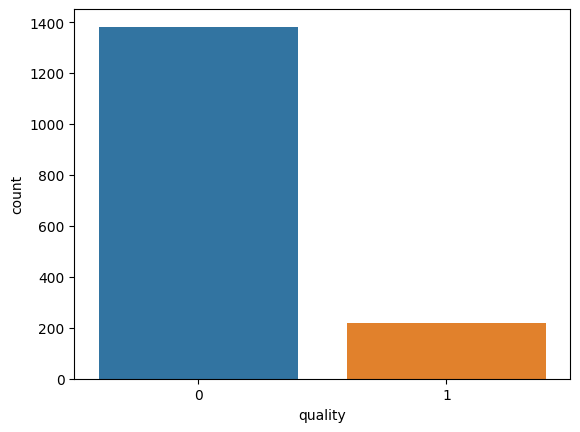

In [13]:
sns.countplot(x='quality', data=wine)

## Train & Test Splitting of Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# test size = 20%, the proportion of the dataset to include in the test split
# random_state, popular integer random seeds are '0' and '42'

In [15]:
# Applying Standard scaling to normalize input variables 
# (think of z-score where each variable has a mean of 0 and a std dev = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model 1: Random Forest Classifier

In [16]:
# Create random forest variable
rfc = RandomForestClassifier(n_estimators=200)
# Fit the training data to the random forest variable
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

### Model Performance

In [17]:
print(classification_report(y_test, pred_rfc))
# tp = true positive, fp = false positive, fn = false negatives
# Precision = tp / (tp + fp) ... the ability of the classifier *not* to label a negative sample as positive.
# Recall = tp / (tp + fn) ... the ability of the classifier to find all the positive samples. 
# F1 Score = weighted mean of precision and recall.
print(confusion_matrix(y_test, pred_rfc))
# The results show that the model is better at identifying a truly bad wine as bad than
# identifying truly good wines as good.

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.53      0.60        47

    accuracy                           0.90       320
   macro avg       0.81      0.75      0.77       320
weighted avg       0.89      0.90      0.89       320

[[262  11]
 [ 22  25]]


## Model 2: Support Vector Model (SVM) Classifier

In [18]:
# SVM = Support Vector Model
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

### Model Performance

In [19]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [20]:
# Confusion Matrix breakdown
#[[true positive    false negative]
#[false postive     true negative]]

## Model 3: Neural Network (Deep Learning) Classifier

In [21]:
# Neural networks are typically better suited for much larger datasets.

mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

### Model Performance

In [22]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       273
           1       0.62      0.64      0.63        47

    accuracy                           0.89       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.89      0.89      0.89       320

[[255  18]
 [ 17  30]]


## Model 4: K-Nearest Neighbors (KNN) Classifier

In [23]:
import math
count = len(y_test)
k_choice = math.sqrt(count)
print('Choose K to be near ' + str(k_choice) + '.')

Choose K to be near 17.88854381999832.


In [24]:
knnc = KNeighborsClassifier(n_neighbors=17, p=2, metric='euclidean')
knnc.fit(X_train, y_train)
pred_knnc = knnc.predict(X_test)

## Model Performance

In [25]:
print(classification_report(y_test, pred_knnc))
print(confusion_matrix(y_test, pred_knnc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.58      0.30      0.39        47

    accuracy                           0.87       320
   macro avg       0.74      0.63      0.66       320
weighted avg       0.84      0.87      0.85       320

[[263  10]
 [ 33  14]]


## Model 5: Decision Tree Classifier

In [26]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
dtc_entropy.fit(X_train, y_train)
pred_dtc = dtc_entropy.predict(X_test)

## Model Performance

In [27]:
print(classification_report(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320

[[264   9]
 [ 36  11]]


## Final Accuracy Results - Using Random Forest Classifier

In [28]:
cm = accuracy_score(y_test, pred_rfc)
cm_percent = cm * 100
print('The best model (Random Forest) has an accuracy of ' + str(cm_percent) + '%.')

The best model (Random Forest) has an accuracy of 89.6875%.


# Prediction Whether a New Wine is Good or Bad

In [29]:
Xnew = pd.DataFrame(np.array([[7.8, 0.58, 0.02, 2, 0.073, 9, 18, 0.9968, 3.36, 0.57, 9.5]]), 
                   columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
Xnew = sc.transform(Xnew)
y_predicted = rfc.predict(Xnew)
if y_predicted == 1:
    print('This is a good wine!')
else:
    print('This is a bad wine.')

This is a good wine!
